Lab 3 : Asking a statistical question

In this lab, we will be focusing on asking statstical questions, which is consist of three steps:

1. Express the question you are going to ask precisely in words.
2. Translating the words into mathematical expression. In this step, there are two substeps: One is to determine the probability distribution(pdf) of the background. Another is to integrate the distribution and get a probability.
3. Converting the probability into significance.

Problem 1

Let's look at our first example. We are looking at the temperature reading (meta-data) associated with an experiment. In order to let the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, the thermal control system and the thermometry do not operate properly and gave us a temperature not at 12 Kelvin and some high and low readings that does not match the real temperature. 

Certainly, we would like to identify and throw out all the data when the thermal control system and tehrmometry are not working. 

We start by simulating 100k 'good' data points assuming Gaussian fluctations, and because we are playing god adding the following 'bad' datapoints: {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}


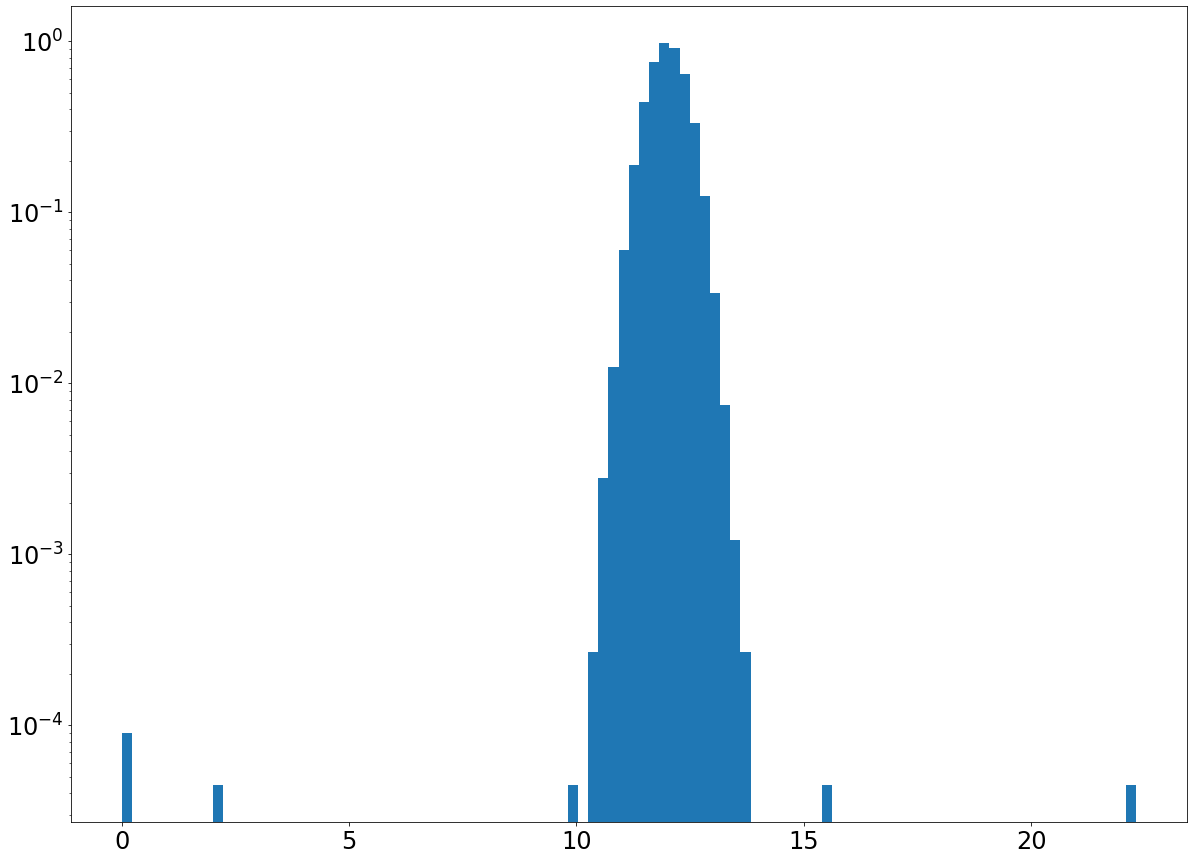

In [88]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from collections import Counter
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

As the graph shown above, it is a log plot of histogram of our temperature data with bad data added. We can see that the normal data are distributed normally. However, there are some outliers where the data are collected when the thermal control system and thermometry is not working properly, so what we need to do is conducting a statistical test and throwing out these data. 

The statistical question we are asking is, in word, in order to be accurate and error-free, which of the data points should we eliminate from our data? Equivalently, which of our data points are located greater than 5σ away from the mean? 

To express our question in math: 

We first take the integral of the probability density fucntion(pdf) with parameters of mean μ = 12 and variance σ = 0.4 in order to find the probability of having a data point that is significant enough to be considered as an outlie and find the temperature by converting the probability we have into sigma. In our case, we are trying to find X, the temperature value, that satisfies the equation X = μ + 5σ.

In [89]:
data = stats.norm.rvs(loc=12, scale=0.4, size=100000)
baddata = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
sig = 5
sig = stats.norm.sf(sig)
max = stats.norm.isf(sig, loc=12, scale=0.4)
min = stats.norm.isf(1-sig, loc=12, scale=0.4)
goodT = data[np.where((data< max) & (data> min))]
testBad1 = len(data) - len(goodT)

baddata = np.asarray(baddata)
badT = baddata[np.where((baddata> min) & (baddata<max))]
testBad2 = len(baddata) - len(badT)

table = pd.DataFrame(np.array([[len(goodT),len(badT)],[testBad1,testBad2]]),index = ['Test Good','Test Bad'], columns=['True T', 'Bad T'])

Then we could construct the Truth Table based on the results we got.

In [90]:
table

,True T,Bad T
Test Good,100000,2
Test Bad,0,6


This is the truth table for 5σ. As we can see, there are 100008 data including 100000 good data and 8 bad data that are supposed to be thrown out. However, from the truth table, we kept all good data but also 2 data that are took when the system is malfunction. Therefore, we have 2 errors of commission but did a good job in omission, which we achieved error-free.

Now let's see what is the relationship between the number of omissions and different statistical thresholds, and, to see, whether we can use the relationship we captured to predict the number of omission we will have.

We will be doing this by constructing the Truth Table for 2σ and 9σ.

In [91]:
sig = 2
sig = stats.norm.sf(sig)
max = stats.norm.isf(sig, loc=12, scale=0.4)
min = stats.norm.isf(1-sig, loc=12, scale=0.4)
goodT = data[np.where((data< max) & (data> min))]
testBad1 = len(data) - len(goodT)

baddata = np.asarray(baddata)
badT = baddata[np.where((baddata> min) & (baddata<max))]
testBad2 = len(baddata) - len(badT)

table = pd.DataFrame(np.array([[len(goodT),len(badT)],[testBad1,testBad2]]),index = ['Test Good','Test Bad'], columns=['True T', 'Bad T'])
table

,True T,Bad T
Test Good,95487,1
Test Bad,4513,7


The above truth table is for 2σ. As we can see from the table, we have decreased our commission error to 1, which means we became more accurate. However, the cost here is 4414 good data points. With a smaller statistical threshold at 2σ, we surely got less commission errors, but our omission error is increased sharply. We have much more omissions than with 5σ.

Now, let us try to construct the truth table for 9σ.

In [92]:
sig = 9
sig = stats.norm.sf(sig)
max = stats.norm.isf(sig, loc=12, scale=0.4)
min = stats.norm.isf(1-sig, loc=12, scale=0.4)
goodT = data[np.where((data< max) & (data> min))]
testBad1 = len(data) - len(goodT)

baddata = np.asarray(baddata)
badT = baddata[np.where((baddata> min) & (baddata<max))]
testBad2 = len(baddata) - len(badT)

table = pd.DataFrame(np.array([[len(goodT),len(badT)],[testBad1,testBad2]]),index = ['Test Good','Test Bad'], columns=['True T', 'Bad T'])
table

,True T,Bad T
Test Good,100000,6
Test Bad,0,2


From the table, we see that as we have a larger significance threshold, 9σ, we have zero omission error, but, in exchange, we get 4 more commission errors. From the comparisions between truth table for 2σ, 5σ, and 9σ, one conclusion we can draw is the number of omission has an inverse relationship with our statistical thresholds. The smaller the statistical threshold, the more omission we have.

Certainly, as we did previouly, there are mistakes of commission, which makes our data inaccurate. The good thing is they are avoidable, and we can achieve this by setting our statistical threshold to a smaller value. Let's see how many mistakes of commission we would have if we reduce our threshold to smaller than 2σ.

In [72]:
sig = 1.75
sig = stats.norm.sf(sig)
max = stats.norm.isf(sig, loc=12, scale=0.4)
min = stats.norm.isf(1-sig, loc=12, scale=0.4)
goodT = data[np.where((data< max) & (data> min))]
testBad1 = len(data) - len(goodT)

baddata = np.asarray(baddata)
badT = baddata[np.where((baddata> min) & (baddata<max))]
testBad2 = len(baddata) - len(badT)

table = pd.DataFrame(np.array([[len(goodT),len(badT)],[testBad1,testBad2]]),index = ['Test Good','Test Bad'], columns=['True T', 'Bad T'])
table

,True T,Bad T
Test Good,92132,0
Test Bad,7868,8


When we reduce our statistical threshold to 1.75σ, we have cleared all commission error, but the cost is almost 8% of good data points.

Problem 2

In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

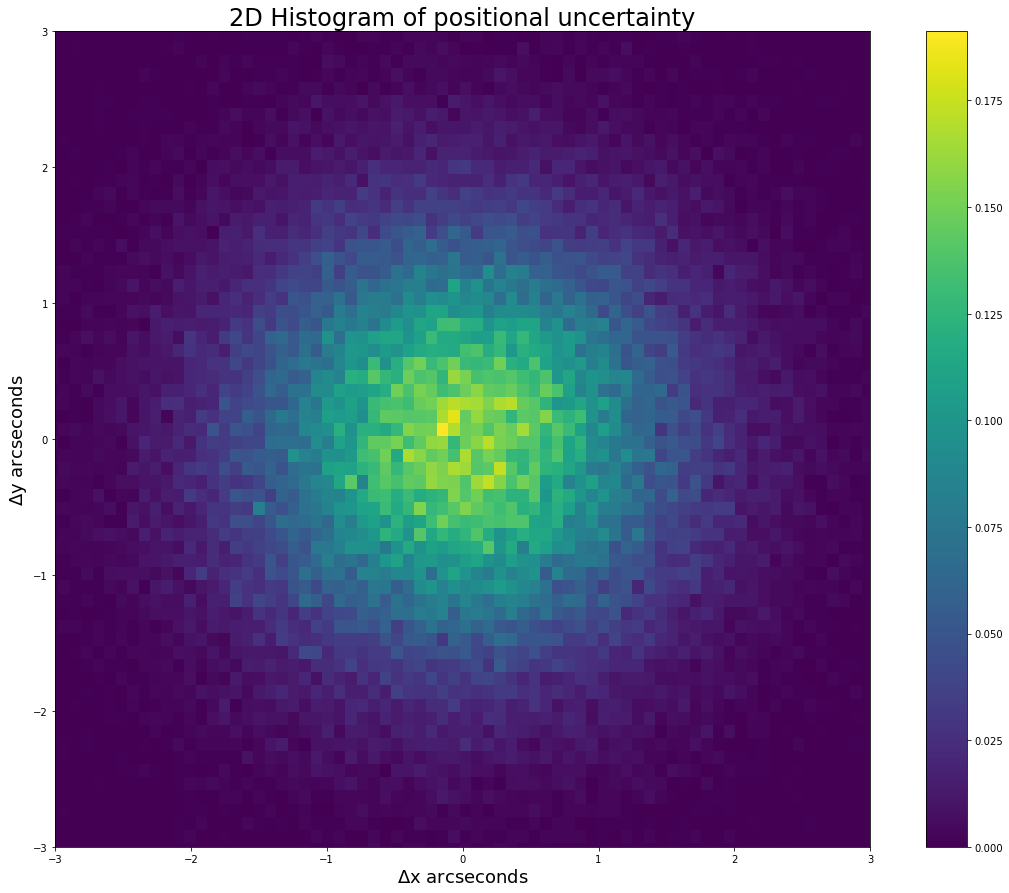

In [74]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

Suppose we have a potential asteroid, and it will have some true movement between the images. The question we would like to ask, in word, is given that the background distribution is a 2D Gaussian with 1 arcsecond RMS, in order to determine the true movement of a potential asteroid, what is the distance which could have a 5σ detection?

In math, our question is: What is the distance d a potential asteroid would have to move for us to be able to have a 5σ detection, 

where      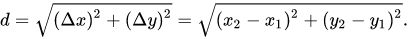

From  the relationship between Rayleigh distribution and Gaussian distribution, we knwo that, since we have two independent normally distributed random variables, in our case X and Y, then the distance d is a Rayleigh distributed random variable with parameter σ. Then, we could find the distance d with 5σ by first calculating the probability and then integrating it.                                      

In [81]:
prob = stats.norm.sf(5)
d = stats.rayleigh.ppf(1 - prob)
print("d = ", d)

d =  5.489079776034238


The distance in arcseconds required for a 5σ detection is 5.489079776034238.

Problem 3

Now let's see an example of cosmic rays. Here is some background information. As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).

Expressiing our question in word, it is: Given that in a moon sized patch on the sky cosmic ray is produced at a rate of 1 cosmic ray per minute, what is the probability for us to observe 6800 cosmic rays in 15 days and 8 hours a day?

To state our question in math, the first thing to do is find out the expected background probability density function. In the backgroudn information, we know that our event here, the cosmic rays, is a discrete event and we are going to describe a probability density of a probability of cosmic ray in a fixed interval with a constant rate. Therefore, we could tell that this is a Poisson distribution. 

The question we are asking in math is: what is the probability of observe 6800 events in a Poisson distribution and what is the significance corresponding to our probability?

In [87]:
mu = 7200
print("Significance = ", scipy.stats.norm.ppf(1 - scipy.stats.poisson.cdf(6800,mu)))

Significance =  4.750747965778662


Thus, the significance of our detection of observing 6800 cosmic rays in 15 days is about 4.75. 